# Hypothesis testing

In [175]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [176]:
# Load data 
df = pd.read_csv("Data/combined_all_data.csv.gz",lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0176694,0.0,/43VrmHOChLcAOG9S5tIFdsxr3u8.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,116369.0,en,Az ember tragédiája,...,0.0,166.0,"[{'english_name': 'Hungarian', 'iso_639_1': 'h...",Released,NaN,The Tragedy of Man,0.0,7.5,13.0,NaN
1,tt0210470,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,239465.0,en,50 Feet of String,...,0.0,53.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,50 Feet of String,0.0,6.0,3.0,NaN
2,tt0323808,0.0,NaN,NaN,7750000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.thewickertreemovie.com/,79544.0,en,The Wicker Tree,...,0.0,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Accept our sacrifice,The Wicker Tree,0.0,3.9,41.0,R
3,tt0372538,0.0,NaN,NaN,5000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.spythemovie.com/,323867.0,en,Spy,...,0.0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Spy,0.0,7.0,1.0,NaN
4,tt0376136,0.0,/lsGygPY9Qt2OclZ67hAYoHLQhAf.jpg,NaN,45000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,23514.0,en,The Rum Diary,...,24000000.0,120.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,One part outrage. One part justice. Three part...,The Rum Diary,0.0,5.9,980.0,R


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39348 entries, 0 to 39347
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                39348 non-null  object 
 1   adult                  39348 non-null  float64
 2   backdrop_path          24819 non-null  object 
 3   belongs_to_collection  2464 non-null   object 
 4   budget                 39348 non-null  float64
 5   genres                 39348 non-null  object 
 6   homepage               10031 non-null  object 
 7   id                     39348 non-null  float64
 8   original_language      39348 non-null  object 
 9   original_title         39348 non-null  object 
 10  overview               38446 non-null  object 
 11  popularity             39348 non-null  float64
 12  poster_path            35869 non-null  object 
 13  production_companies   39348 non-null  object 
 14  production_countries   39348 non-null  object 
 15  re

# Q1. Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

Null Hypothesis: MPAA ratings do not affect how much revenue a movie generates

Alternate Hypothesis: MPAA ratings have a significant affect on how much revenue a movie generates.



In [178]:
# get certification features
df["certification"].value_counts()

R          3525
NR         2242
PG-13      1914
PG          850
G           293
NC-17       104
Unrated       5
-             1
R             1
PG-13         1
10            1
Name: certification, dtype: int64

In [179]:
# Drop - value 
df.drop(df.loc[df["certification"]=="-"].index, inplace = True)

In [180]:
# drop 10 value
df.drop(df.loc[df["certification"]=="10"].index, inplace = True)

In [181]:
# Drop unrated 
df.drop(df.loc[df["certification"]=="Unrated"].index, inplace = True)

In [182]:
# Inspect stand alone r value
df.loc[df["certification"]=="R "]

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4231,tt1091191,0.0,/hmEbQB5UlcwobldcSDNlLZiUnmA.jpg,NaN,40000000.0,"[{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...",http://www.lonesurvivorfilm.com,193756.0,en,Lone Survivor,...,149295601.0,121.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Based on true acts of courage,Lone Survivor,0.0,7.4,3513.0,R


In [183]:
# remove space in stand alone R
df["certification"] = df["certification"].replace("R ","R")

In [184]:
# Inspect standalone PG-13
df.loc[df["certification"]=="PG-13 "]

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
37427,tt3110960,0.0,/aJxq9qRoOuVPCRagcDNVB4nrDan.jpg,NaN,0.0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,262958.0,en,Jimmy's Hall,...,4825184.0,106.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Where Anything Goes and Everyone Belongs.,Jimmy's Hall,0.0,6.7,153.0,PG-13


In [185]:
# remove space in PG-13
df["certification"] = df["certification"].replace("PG-13 ","PG-13")

In [186]:
# Drop NR rating because not asked for
df.drop(df.loc[df["certification"]=="NR"].index, inplace = True)


In [187]:
# Drop NC-17 because not asked for
df.drop(df.loc[df["certification"]=="NC-17"].index, inplace = True)

In [188]:
# Drop nan values 
df = df.dropna(subset = ["certification","revenue"])

In [189]:
# Create groups dict
# Create groups dict
groups = {}
# Loop 
for i in df["certification"].unique():
    # get series for group and rename
    data = df.loc[df["certification"]==i, "revenue"].copy()
    
    # save into dict
    groups[i] = data
groups.keys()

dict_keys(['R', 'G', 'PG-13', 'PG'])

## Normality Test

In [190]:
# Normality test of each group and confirming there is greater than 15 in each group 
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    # save pval, test stat, and size of group 
    norm_results[i] = {"n":len(data),
                      "p":p,
                      "test_stat":stat,}
# convert to df
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test_stat
R,3526.0,0.000000e+00,4424.729181
G,293.0,3.897739e-83,379.508332
PG-13,1915.0,0.000000e+00,1945.155293
PG,850.0,7.598428e-156,714.350666


In [191]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df


,n,p,test_stat,sig
R,3526.0,0.000000e+00,4424.729181,True
G,293.0,3.897739e-83,379.508332,True
PG-13,1915.0,0.000000e+00,1945.155293,True
PG,850.0,7.598428e-156,714.350666,True


- Our groups don't have normal distribution since all have pvalues < 0.05

## Testing assumption of Equal Variance

In [192]:
stats.levene(*groups.values())

LeveneResult(statistic=91.60424151374123, pvalue=4.486207892078094e-58)

- Our p-value is <0.05 therefore, our groups do not have equal variance

## Perform Kruskal Wallis Test

Due to the fact
- Target is numeric and has more than 2 samples
- Observations are independent
- Doesn't have normality or equal variance

In [193]:
# Perform test
results = stats.kruskal(*groups.values())
results

KruskalResult(statistic=217.83909871253755, pvalue=5.886116029875737e-47)

## Final Assumption

- Based on our results, our p-value is <0.05 therefore, we reject our null hypothesis and confirm that MPAA ratings have a significant affect on revenue

In [194]:
## save the values as revenue and the labels to the certification
values = df['revenue']
labels = df['certification']
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,48378105.4618,0.0,23305846.7025,73450364.2212,True
G,PG-13,50292001.9357,0.0,27075597.8391,73508406.0324,True
G,R,-10550941.3515,0.6237,-33052545.7032,11950663.0002,False
PG,PG-13,1913896.4739,0.9884,-13339527.2599,17167320.2077,False
PG,R,-58929046.8133,0.0,-73070748.0839,-44787345.5428,True
PG-13,R,-60842943.2872,0.0,-71348702.4083,-50337184.1662,True


- PG-13 and PG have signifiantly higher revenues then R and G

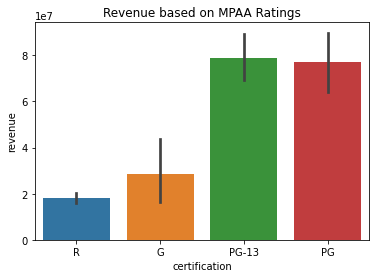

In [195]:
# Visualize 
ax = sns.barplot(data = df, x = "certification", y = "revenue")
ax.set_title("Revenue based on MPAA Ratings");

In [196]:
means = df.groupby("certification")["revenue"].mean()
means

certification
G        2.857613e+07
PG       7.695424e+07
PG-13    7.886813e+07
R        1.802519e+07
Name: revenue, dtype: float64

- Based on the meand and visual PG-13 earns the most revenue and outperforms PG slighly

# Q.2 Do movies in 2019 earn less revenue than movies released in 2018?

Null Hypothesis: Movies in 2019 do not earn less revenue than movies released in 2018.

Alternate Hypothesis: Movies in 2019 earn significantly less revenue than movies released in 2018.

In [233]:
# Reload data 
df = pd.read_csv("Data/combined_all_data.csv.gz",lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0176694,0.0,/43VrmHOChLcAOG9S5tIFdsxr3u8.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,116369.0,en,Az ember tragédiája,...,0.0,166.0,"[{'english_name': 'Hungarian', 'iso_639_1': 'h...",Released,NaN,The Tragedy of Man,0.0,7.5,13.0,NaN
1,tt0210470,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,239465.0,en,50 Feet of String,...,0.0,53.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,50 Feet of String,0.0,6.0,3.0,NaN
2,tt0323808,0.0,NaN,NaN,7750000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.thewickertreemovie.com/,79544.0,en,The Wicker Tree,...,0.0,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Accept our sacrifice,The Wicker Tree,0.0,3.9,41.0,R
3,tt0372538,0.0,NaN,NaN,5000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.spythemovie.com/,323867.0,en,Spy,...,0.0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Spy,0.0,7.0,1.0,NaN
4,tt0376136,0.0,/lsGygPY9Qt2OclZ67hAYoHLQhAf.jpg,NaN,45000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,23514.0,en,The Rum Diary,...,24000000.0,120.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,One part outrage. One part justice. Three part...,The Rum Diary,0.0,5.9,980.0,R


In [234]:
# How many movies in 2019 and how many in 2018 
df["release_date"].value_counts()

2010-01-01    240
2011-01-01    209
2012-01-01    183
2014-01-01    164
2015-01-01    146
             ... 
2020-10-25      1
2021-02-18      1
2020-11-06      1
2012-03-18      1
2015-01-18      1
Name: release_date, Length: 4644, dtype: int64

In [235]:
# split release date into 3 columns 
new_cols = ["year","month","day"]
df[new_cols] = df["release_date"].str.split("-", expand = True)
df[new_cols] = df[new_cols].astype(float)
df.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,status,tagline,title,video,vote_average,vote_count,certification,year,month,day
0,tt0176694,0.0,/43VrmHOChLcAOG9S5tIFdsxr3u8.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,116369.0,en,Az ember tragédiája,...,Released,NaN,The Tragedy of Man,0.0,7.5,13.0,NaN,2011.0,11.0,27.0
1,tt0210470,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,239465.0,en,50 Feet of String,...,Released,NaN,50 Feet of String,0.0,6.0,3.0,NaN,1995.0,1.0,1.0


In [236]:
# drop release date
df = df.drop(columns = "release_date")

In [237]:
# How many in 2018
df["year"].loc[df["year"]==2018.0].value_counts()


2018.0    4363
Name: year, dtype: int64

In [238]:
# How many in 2019
df["year"].loc[df["year"]==2019.0].value_counts()

2019.0    4541
Name: year, dtype: int64

In [239]:
# filtering out 2018 and 2019
df_2018 = df.loc[df["year"]==2018.0]
df_2019 = df.loc[df["year"]==2019.0]

In [240]:
df_2018.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,status,tagline,title,video,vote_average,vote_count,certification,year,month,day
6470,tt2723334,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,574798.0,en,Darkness Comes,...,Released,When the Light Dies... So Do You,Darkness Comes,0.0,0.0,0.0,NaN,2018.0,5.0,15.0
7638,tt0825334,0.0,/5Kd0Bi0mg4gJtbWW0jJDjPznBOB.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,276686.0,it,Caravaggio and My Mother the Pope,...,Released,NaN,Caravaggio and My Mother the Pope,0.0,0.0,0.0,NaN,2018.0,12.0,10.0


In [241]:
df_2019.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,status,tagline,title,video,vote_average,vote_count,certification,year,month,day
7600,tt6208032,0.0,/6GBMyROBo9Uh3CCbXqEDCLgXawv.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",NaN,575331.0,fa,آشغال های دوست داشتنی,...,Released,NaN,Lovely Trash,0.0,4.7,3.0,NaN,2019.0,2.0,13.0
7758,tt1987680,0.0,/4lQQVRLc7OCEFH6OUaMztwiFPbQ.jpg,NaN,37500000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.theupside.movie/,440472.0,en,The Upside,...,Released,Based on a true story.,The Upside,0.0,7.1,969.0,NaN,2019.0,1.0,10.0


In [206]:
# define feature of interest
revenue_2018 = df_2018["revenue"]
revenue_2019 = df_2019["revenue"]

## Check for Outliers

In [242]:
# Check for outliers in 2018 
zcores_2018 = stats.zscore(revenue_2018)
outliers = abs(zcores_2018)>3
np.sum(outliers)

20

In [243]:
# Remove outliers since it's only 20 out of 4363
revenue_2018 = revenue_2018[(np.abs(stats.zscore(revenue_2018))<3)]

In [244]:
# check for outliers in 2019
zcores_2019 = stats.zscore(revenue_2019)
outliers = abs(zcores_2019)>3
np.sum(outliers)

17

In [245]:
# Remove outliers since it's only 17 out of 4541
revenue_2019 = revenue_2019[(np.abs(stats.zscore(revenue_2019))<3)]

## Check for Normality 

In [246]:
# Check for normality in 2018
result_2018_rev = stats.normaltest(revenue_2018)
result_2018_rev

NormaltestResult(statistic=476.0121602637594, pvalue=4.3179015827111206e-104)

In [247]:
# Check for normality in 2019
result_2019_rev = stats.normaltest(revenue_2019)
result_2019_rev

NormaltestResult(statistic=419.30416465643657, pvalue=8.897285473466299e-92)

- Since both our p values are both < 0.05 neither of our groups are normally distributed. 

## Check for Equal Variance

In [248]:
result = stats.levene(revenue_2018,revenue_2019)
result

LeveneResult(statistic=1.0399980686223262, pvalue=0.308053957777348)

- Our pvalue is > 0.05 therefore we have equal variance. 

## Perform Independent t-test
- We do not have normal distribution but because we have more than 15 samples we will continue
- Equal variance is met
- 2 Groups are being compared
- No significant outliers

In [249]:
# Run independent t-test
result = stats.ttest_ind(revenue_2018, revenue_2019)
result

Ttest_indResult(statistic=-1.0198029557823052, pvalue=0.30805395777731825)

In [250]:
# concat dfs for visualization
final_df = pd.concat([df_2018,df_2019])
final_df.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,status,tagline,title,video,vote_average,vote_count,certification,year,month,day
6470,tt2723334,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,574798.0,en,Darkness Comes,...,Released,When the Light Dies... So Do You,Darkness Comes,0.0,0.0,0.0,NaN,2018.0,5.0,15.0
7638,tt0825334,0.0,/5Kd0Bi0mg4gJtbWW0jJDjPznBOB.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,276686.0,it,Caravaggio and My Mother the Pope,...,Released,NaN,Caravaggio and My Mother the Pope,0.0,0.0,0.0,NaN,2018.0,12.0,10.0


## Final Assumption
- Based on our results our pvalue >0.05 so we accept the null hypothesis of movies in 2019 does not earn a significant amount less revenue than movies released in 2018

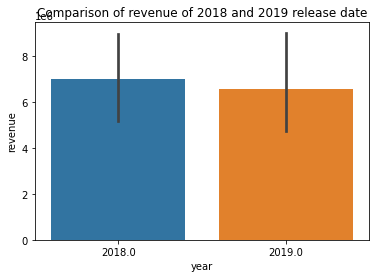

In [251]:
# Visualization 
ax = sns.barplot(data =df , x = final_df["year"], y = df["revenue"])
ax.set_title("Comparison of revenue of 2018 and 2019 release date");

# Q3. Do movies with budgets greater than the average earn more revenue than movies with budgets below the average
- Null Hypothesis: Movies that have budgets greater than the average do not earn more than movies with budgets below the average
- Alternate Hypothesis: Movies that have budgets greater than the average earn more than movies with budgets below the average

In [252]:
# Reload data 
df = pd.read_csv("Data/combined_all_data.csv.gz",lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0176694,0.0,/43VrmHOChLcAOG9S5tIFdsxr3u8.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,116369.0,en,Az ember tragédiája,...,0.0,166.0,"[{'english_name': 'Hungarian', 'iso_639_1': 'h...",Released,NaN,The Tragedy of Man,0.0,7.5,13.0,NaN
1,tt0210470,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,239465.0,en,50 Feet of String,...,0.0,53.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,50 Feet of String,0.0,6.0,3.0,NaN
2,tt0323808,0.0,NaN,NaN,7750000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.thewickertreemovie.com/,79544.0,en,The Wicker Tree,...,0.0,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Accept our sacrifice,The Wicker Tree,0.0,3.9,41.0,R
3,tt0372538,0.0,NaN,NaN,5000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.spythemovie.com/,323867.0,en,Spy,...,0.0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Spy,0.0,7.0,1.0,NaN
4,tt0376136,0.0,/lsGygPY9Qt2OclZ67hAYoHLQhAf.jpg,NaN,45000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,23514.0,en,The Rum Diary,...,24000000.0,120.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,One part outrage. One part justice. Three part...,The Rum Diary,0.0,5.9,980.0,R


In [253]:
# get the mean of budget
mean = df["budget"].mean()
mean

2849458.8594083562

In [255]:
# Filter out movies with budget greater than the mean
greater_df = df.loc[df["budget"]> mean]
greater_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3472 entries, 2 to 39264
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                3472 non-null   object 
 1   adult                  3472 non-null   float64
 2   backdrop_path          3348 non-null   object 
 3   belongs_to_collection  704 non-null    object 
 4   budget                 3472 non-null   float64
 5   genres                 3472 non-null   object 
 6   homepage               1623 non-null   object 
 7   id                     3472 non-null   float64
 8   original_language      3472 non-null   object 
 9   original_title         3472 non-null   object 
 10  overview               3470 non-null   object 
 11  popularity             3472 non-null   float64
 12  poster_path            3464 non-null   object 
 13  production_companies   3472 non-null   object 
 14  production_countries   3472 non-null   object 
 15  rel

In [256]:
# How many movies have budgets higher than the mean?
len(greater_df)

3472

In [258]:
# Filter out movies with budget less than the mean
less_df = df.loc[df["budget"]< mean]
less_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35876 entries, 0 to 39347
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                35876 non-null  object 
 1   adult                  35876 non-null  float64
 2   backdrop_path          21471 non-null  object 
 3   belongs_to_collection  1760 non-null   object 
 4   budget                 35876 non-null  float64
 5   genres                 35876 non-null  object 
 6   homepage               8408 non-null   object 
 7   id                     35876 non-null  float64
 8   original_language      35876 non-null  object 
 9   original_title         35876 non-null  object 
 10  overview               34976 non-null  object 
 11  popularity             35876 non-null  float64
 12  poster_path            32405 non-null  object 
 13  production_companies   35876 non-null  object 
 14  production_countries   35876 non-null  object 
 15  re

In [259]:
# How many movies have budgets lower than the mean?
len(less_df)

35876

In [260]:
# define feature of interest
greater_rev = greater_df["revenue"]
less_rev = less_df["revenue"]

## Check for Outliers

In [261]:
# check for outliers in greater group 
zscores = stats.zscore(greater_rev)
outliers = abs(zscores)>3
np.sum(outliers)

95

In [262]:
# drop outliers since its 95 out of 3472
greater_rev = greater_rev[(np.abs(stats.zscore(greater_rev))<3)]

In [263]:
# check for outliers in less group 
zscores = stats.zscore(less_rev)
outliers = abs(zscores)>3
np.sum(outliers)

163

In [264]:
# drop outliers since its 163 out of 35876
less_rev = less_rev[(np.abs(stats.zscore(less_rev))<3)]

## Check for Normality 

In [265]:
# check for normality in greater group
result_greater = stats.normaltest(greater_rev)
result_greater

NormaltestResult(statistic=1897.857593881051, pvalue=0.0)

In [266]:
# check for normality in non-smoker group 
result_less = stats.normaltest(less_rev)
result_less

NormaltestResult(statistic=57125.4628066029, pvalue=0.0)

- pvalue is < 0.05 therefore neither of our groups are normally distributed

## Check for Equal Variance

In [267]:
result = stats.levene(greater_rev, less_rev)
result

LeveneResult(statistic=11438.10701769426, pvalue=0.0)

- pvalue is <0.05 therefore we do not have equal variance but will still run the test with equal_var = false

## Perform Independent t-test
- We do not have normal distribution but because we have more than 15 samples we will continue
- Equal variance is not met so we will pass equal_var = False
- 2 Groups are being compared
- No significant outliers

In [268]:
# Run independent t-test
result = stats.ttest_ind(greater_rev, less_rev, equal_var = False)
result

Ttest_indResult(statistic=32.25675731030697, pvalue=3.1789696824831126e-199)

In [269]:
# concat dfs for visualization
final_df = pd.concat([greater_df,less_df])
final_df.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
2,tt0323808,0.0,NaN,NaN,7750000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.thewickertreemovie.com/,79544.0,en,The Wicker Tree,...,0.0,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Accept our sacrifice,The Wicker Tree,0.0,3.9,41.0,R
3,tt0372538,0.0,NaN,NaN,5000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.spythemovie.com/,323867.0,en,Spy,...,0.0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Spy,0.0,7.0,1.0,NaN


In [279]:
# Create new column to assist in visualization
final_df["is_greater"] = final_df["budget"] > mean
final_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,is_greater
2,tt0323808,0.0,NaN,NaN,7750000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.thewickertreemovie.com/,79544.0,en,The Wicker Tree,...,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Accept our sacrifice,The Wicker Tree,0.0,3.9,41.0,R,True
3,tt0372538,0.0,NaN,NaN,5000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.spythemovie.com/,323867.0,en,Spy,...,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Spy,0.0,7.0,1.0,NaN,True
4,tt0376136,0.0,/lsGygPY9Qt2OclZ67hAYoHLQhAf.jpg,NaN,45000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,23514.0,en,The Rum Diary,...,120.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,One part outrage. One part justice. Three part...,The Rum Diary,0.0,5.9,980.0,R,True
5,tt0377981,0.0,/w3LLngJIAA1R7Mp2S3G0HZl2R3H.jpg,"{'id': 493668, 'name': 'Gnomeo & Juliet Collec...",36000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://gnomeoandjuliet.com/,45772.0,en,Gnomeo & Juliet,...,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A LITTLE ADVENTURE GOES A LAWN WAY.,Gnomeo & Juliet,0.0,5.8,1660.0,G,True
6,tt0409847,0.0,/f1jJPQ0RhgSOOfBprCJd9ZJMbet.jpg,NaN,163000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.cowboysandaliensmovie.com/,49849.0,en,Cowboys & Aliens,...,119.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,First Contact. Last Stand.,Cowboys & Aliens,0.0,5.6,4340.0,PG-13,True


## Final Assumption
- Our pvalue is < 0.05 therefore we reject our null hypothesis and assume that movies with a budget higher than the average earn more than movies with budgets below the average

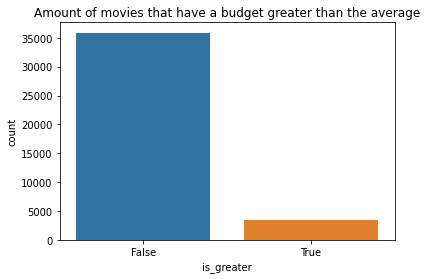

In [283]:
# Visualization of amount of movies 
ax = sns.countplot(data =df , x = "is_greater")
ax.set_title("Amount of movies that have a budget greater than the average");